In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [323]:
data = pd.read_csv('Cyberattacks_Detection[1].csv')

/tmp/ipython-input-3503646302.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Cyberattacks_Detection[1].csv')


In [324]:

data.head(10)

,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
0,1.0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Detected,0.600507,K-Nearest Neighbors,Cloud Storage,Other,NaN
1,2.0,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Detected,0.524150,K-Nearest Neighbors,Network Router,Other,NaN
2,4.0,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Not Detected,0.238944,Neural Network,Workstation,Other,NaN
3,5.0,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Not Detected,0.122334,Neural Network,Workstation,Other,NaN
4,6.0,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Detected,0.970895,Neural Network,Application Server,Other,NaN
5,7.0,63.3.248.107,164.230.60.103,USA,Russia,ICMP,38442.0,6987.0,Insider Threat,2688.0,Detected,0.726889,K-Nearest Neighbors,Application Server,Other,NaN
6,8.0,141.134.47.191,208.197.51.253,UK,China,TCP,32386.0,43941.0,Phishing,4634.0,Detected,0.835731,K-Nearest Neighbors,Web Server,Other,NaN
7,9.0,238.9.16.36,88.216.224.37,France,Brazil,TCP,53829.0,57201.0,Insider Threat,2600.0,Not Detected,0.451888,Support Vector Machine,Web Server,Other,NaN
8,10.0,78.204.255.208,247.137.240.62,France,Brazil,UDP,22699.0,40920.0,Watering Hole Attack,4285.0,Not Detected,0.111313,Support Vector Machine,Database Server,Other,NaN
9,11.0,10.3.220.103,218.103.44.83,Japan,Germany,TCP,27956.0,3318.0,SQL Injection,165.0,Detected,0.759597,K-Nearest Neighbors,Email Server,Other,NaN


In [325]:
data.shape

(100000, 16)

In [326]:
data.describe()

,Attack ID,Source Port,Destination Port,Payload Size (bytes),Confidence Score
count,99940.000000,99949.000000,99946.000000,99947.00000,99946.000000
mean,54435.925856,32774.963661,32659.780371,2501.75549,0.498099
std,30550.934530,18962.083103,18910.845867,1443.22658,0.290283
min,1.000000,1.000000,1.000000,1.00000,0.000030
25%,27700.750000,16338.000000,16273.250000,1252.00000,0.245179
50%,55457.500000,32694.000000,32625.000000,2501.00000,0.501513
75%,83196.250000,49272.000000,49018.750000,3753.00000,0.750472
max,100000.000000,65534.000000,65534.000000,4999.00000,1.000000


Identification of Missing values

In [327]:
data.isna().sum()

,0
Attack ID,60
Source IP,50
Destination IP,55
Source Country,50
Destination Country,53
Protocol,59
Source Port,51
Destination Port,54
Attack Type,59
Payload Size (bytes),53


In [328]:
(100*data.isnull().sum()/len(data)).round(2)

,0
Attack ID,0.06
Source IP,0.05
Destination IP,0.06
Source Country,0.05
Destination Country,0.05
Protocol,0.06
Source Port,0.05
Destination Port,0.05
Attack Type,0.06
Payload Size (bytes),0.05


In [329]:
null_attack_id_rows = data[data['Attack ID'].isnull()]
display(null_attack_id_rows)

,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
2342,NaN,79.208.243.252,242.34.126.168,South Korea,France,ICMP,56454.0,47953.0,Simple Network Management Protocol (SNMP) Attack,2725.0,Detected,0.541092,Random Forest,Workstation,Other,NaN
2517,NaN,80.2.179.33,133.117.55.78,Japan,South Korea,UDP,43818.0,19636.0,SQL Injection,4297.0,Not Detected,0.389182,Neural Network,Application Server,Other,NaN
4198,NaN,71.72.245.247,212.73.59.85,UK,Germany,ICMP,62611.0,55464.0,Watering Hole Attack,3527.0,Not Detected,0.270337,K-Nearest Neighbors,Application Server,Other,NaN
5842,NaN,230.81.55.212,44.78.122.65,India,Japan,ICMP,36108.0,38697.0,Cross-Site Scripting (XSS) Attack,2769.0,Not Detected,0.121924,K-Nearest Neighbors,Email Server,Other,NaN
8611,NaN,39.88.95.224,236.43.227.226,China,Brazil,TCP,10721.0,48089.0,Cryptojacking,985.0,Not Detected,0.201849,Support Vector Machine,Application Server,Other,NaN
12342,NaN,78.3.83.101,156.6.165.126,China,Brazil,UDP,61204.0,41552.0,Simple Network Management Protocol (SNMP) Attack,226.0,Detected,0.720102,K-Nearest Neighbors,Application Server,Other,NaN
13219,NaN,133.78.94.222,167.30.197.226,France,France,TCP,3944.0,7311.0,Watering Hole Attack,1825.0,Detected,0.975039,Neural Network,Workstation,Other,NaN
13498,NaN,137.86.200.93,95.252.134.220,USA,China,TCP,27085.0,33224.0,Malware,1222.0,Detected,0.740724,Logistic Regression,Network Router,Other,NaN
15309,NaN,177.241.42.52,201.69.140.39,Germany,USA,ICMP,56060.0,9160.0,DNS Tunneling,3262.0,Not Detected,0.058563,Support Vector Machine,Database Server,Other,NaN
15805,NaN,85.241.22.191,137.189.46.83,France,Japan,ICMP,40933.0,53217.0,SQL Injection,3314.0,Detected,0.913788,Support Vector Machine,Email Server,Other,NaN


This code filters the `data` DataFrame to find all rows where the 'Attack ID' column contains a null (NaN) value and then displays these rows.

For each attribute except Timestamp, the percentage of missing values is less than 30%.

#DATA PREPARATION

First, let handle attack ID missing values. Since this attribute is a unique value between 1 and 100000, we impute this feature using the previous one + 1

In [330]:
# interpolate(method='linear', limit_direction='forward') achieves this sequential fill
data['Attack ID'] = data['Attack ID'].interpolate(method='linear', limit_direction='forward')

# Convert 'Attack ID' to integer type, as IDs are typically whole numbers
data['Attack ID'] = data['Attack ID'].astype(int)

In [331]:
# Verify that there are no more missing 'Attack ID' values
missing_attack_id_count_after_imputation = data['Attack ID'].isnull().sum()
print(f"Number of missing values in 'Attack ID' after imputation: {missing_attack_id_count_after_imputation}")

# Display a sample of the 'Attack ID' column to show the imputed values
display(data[data['Attack ID'].duplicated(keep=False)].head(10))

Number of missing values in 'Attack ID' after imputation: 0


,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
81305,90175,229.244.171.25,32.14.26.217,China,China,TCP,11367.0,54923.0,Phishing,4110.0,Not Detected,0.393006,Support Vector Machine,Cloud Storage,Other,NaN
81306,90176,59.165.169.137,7.88.31.154,UK,Russia,ICMP,39567.0,40096.0,Man-in-the-Middle (MITM),4903.0,Detected,0.921073,Support Vector Machine,Network Router,Other,NaN
81307,90177,91.106.39.96,217.131.236.13,Russia,Russia,TCP,65375.0,39864.0,File Transfer Protocol (FTP) Attack,3907.0,Not Detected,0.409132,Support Vector Machine,Application Server,Other,NaN
81308,90178,189.149.19.195,183.235.102.85,Russia,Brazil,ICMP,11804.0,46400.0,Cryptojacking,1679.0,Not Detected,0.221684,Neural Network,Network Router,Other,NaN
81309,90179,167.248.134.172,119.106.132.188,Brazil,China,TCP,48529.0,2227.0,Drive-by Download,4130.0,Not Detected,0.002383,Support Vector Machine,Database Server,Other,NaN
81310,90180,14.212.94.37,97.234.192.184,USA,Brazil,ICMP,26827.0,9652.0,Phishing,4190.0,Detected,0.773861,Logistic Regression,Network Router,Other,NaN
81311,90181,151.113.70.2,182.108.10.98,USA,USA,UDP,51746.0,19543.0,File Transfer Protocol (FTP) Attack,2584.0,Not Detected,0.324680,K-Nearest Neighbors,Database Server,Other,NaN
81312,90182,205.79.42.198,127.54.19.84,India,NaN,ICMP,14024.0,48863.0,File Transfer Protocol (FTP) Attack,258.0,Not Detected,0.221286,K-Nearest Neighbors,Web Server,Other,NaN
81313,90183,235.71.183.30,151.79.13.142,China,USA,ICMP,42893.0,1943.0,Cross-Site Scripting (XSS) Attack,2303.0,Detected,0.729688,Logistic Regression,Network Router,Other,NaN
81314,90185,22.112.171.121,202.24.165.0,India,UK,TCP,30449.0,19214.0,Man-in-the-Middle (MITM),873.0,Not Detected,0.014177,Neural Network,Workstation,Other,NaN


The code first uses `interpolate(method='linear', limit_direction='forward')` on the 'Attack ID' column. This method fills `NaN` values by creating a linear sequence between valid numbers, which in this case effectively means adding 1 to the previous valid ID for each `NaN` in a sequence. After imputation, the column is converted to an integer type. The subsequent output verifies that no null values remain and shows a sample of the updated 'Attack ID' column where imputation occurred.

In [332]:
data.isnull().sum()

,0
Attack ID,0
Source IP,50
Destination IP,55
Source Country,50
Destination Country,53
Protocol,59
Source Port,51
Destination Port,54
Attack Type,59
Payload Size (bytes),53


Second, let impute the Source IP and Destination IP variable. Since these variable are unique, we create a new value called "Unknow"

In [333]:
null_attack_id_rows = data[data['Source IP'].isnull()]
display(null_attack_id_rows)

,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
2482,2738,NaN,78.131.197.121,Japan,South Korea,ICMP,30511.0,8492.0,Zero-Day Exploit,1018.0,Detected,0.876168,K-Nearest Neighbors,IoT Device,Other,NaN
3023,3337,NaN,75.85.13.6,Brazil,Japan,UDP,65296.0,22612.0,Drive-by Download,266.0,Not Detected,0.271085,Logistic Regression,Email Server,Other,NaN
3923,4334,NaN,41.107.253.209,South Korea,Germany,UDP,20307.0,46947.0,SQL Injection,2622.0,Detected,0.936208,Neural Network,Database Server,Other,NaN
4065,4484,NaN,162.1.114.66,India,China,UDP,13830.0,9756.0,Cryptojacking,2241.0,Not Detected,0.089685,Random Forest,IoT Device,Other,NaN
9695,10704,NaN,225.80.215.24,Russia,India,TCP,7005.0,62022.0,Cross-Site Scripting (XSS) Attack,162.0,Not Detected,0.004442,K-Nearest Neighbors,Firewall,Other,NaN
15241,16844,NaN,87.6.98.86,China,China,UDP,41217.0,37236.0,Remote Desktop Protocol (RDP) Attack,3671.0,Detected,0.599800,K-Nearest Neighbors,IoT Device,Other,NaN
18764,20784,NaN,87.106.220.103,Russia,France,ICMP,60419.0,3162.0,Remote Desktop Protocol (RDP) Attack,1650.0,Detected,0.637652,K-Nearest Neighbors,Workstation,Other,NaN
19104,21158,NaN,90.171.7.17,South Korea,South Korea,TCP,61475.0,49743.0,Brute Force,1958.0,Detected,0.848637,Random Forest,Workstation,Other,NaN
19134,21197,NaN,42.11.163.201,Brazil,China,TCP,18025.0,9104.0,Credential Stuffing,879.0,Not Detected,0.014366,Random Forest,Email Server,Other,NaN
21851,24202,NaN,129.116.24.156,Russia,India,ICMP,37736.0,47243.0,Cryptojacking,2047.0,Detected,0.738117,K-Nearest Neighbors,Cloud Storage,Other,NaN


In [334]:
# Fill missing 'Source IP' values with 'unknow'
data['Source IP'] = data['Source IP'].fillna('unknow')
data['Destination IP']= data['Destination IP'].fillna('unknow')

In [335]:
data.isnull().sum()

,0
Attack ID,0
Source IP,0
Destination IP,0
Source Country,50
Destination Country,53
Protocol,59
Source Port,51
Destination Port,54
Attack Type,59
Payload Size (bytes),53


Imputation of categorical value using most frequent technique

In [336]:
from sklearn.impute import SimpleImputer
imputer_1 = SimpleImputer(strategy='most_frequent')
data[['Destination Country','Source Country', 'Protocol','Attack Type', 'ML Model', 'Affected System']] = imputer_1.fit_transform(data[['Destination Country','Source Country', 'Protocol','Attack Type', 'ML Model', 'Affected System']])

In [337]:
data.isnull().sum()

,0
Attack ID,0
Source IP,0
Destination IP,0
Source Country,0
Destination Country,0
Protocol,0
Source Port,51
Destination Port,54
Attack Type,0
Payload Size (bytes),53


Imputation of Source port and Destination port using Median.

In [338]:
from sklearn.impute import SimpleImputer
imputer_2 = SimpleImputer(strategy='median')
data[['Source Port', 'Destination Port']]= imputer_2.fit_transform(data[['Source Port', 'Destination Port']])

In [339]:
data.isnull().sum()

,0
Attack ID,0
Source IP,0
Destination IP,0
Source Country,0
Destination Country,0
Protocol,0
Source Port,0
Destination Port,0
Attack Type,0
Payload Size (bytes),53


Imputation for payload and confidence score attribute with linear regression

In [340]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# 1. Define features (X) and target (y)
X_features = ['Protocol', 'Attack Type', 'Affected System']
y_target = 'Payload Size (bytes)'

# 2. Separate data into known and missing payload size
known_payload_data = data[data[y_target].notnull()].copy()
missing_payload_data = data[data[y_target].isnull()].copy()

# Check if there are any missing values to impute
if missing_payload_data.empty:
    print("No missing 'Payload Size (bytes)' values to impute.")
else:
    # 3. Prepare X_train, y_train, and X_predict
    X_train = known_payload_data[X_features]
    y_train = known_payload_data[y_target]
    X_predict = missing_payload_data[X_features]

    # 4. One-hot encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X_features)
        ],
        remainder='passthrough'
    )

    X_train_encoded = preprocessor.fit_transform(X_train)
    X_predict_encoded = preprocessor.transform(X_predict)

    # 5. Train a DecisionTreeRegressor
    dt_regressor = DecisionTreeRegressor(random_state=42)
    dt_regressor.fit(X_train_encoded, y_train)

    # 6. Predict the missing values
    predicted_payload_sizes = dt_regressor.predict(X_predict_encoded)

    # 7. Fill the original DataFrame's missing 'Payload Size (bytes)' with predictions
    data.loc[data[y_target].isnull(), y_target] = predicted_payload_sizes
    print("Imputation of 'Payload Size (bytes)' completed using Decision Tree Regressor.")

# Verify no more missing values in 'Payload Size (bytes)'
print(f"Missing values in 'Payload Size (bytes)' after imputation: {data[y_target].isnull().sum()}")

Imputation of 'Payload Size (bytes)' completed using Decision Tree Regressor.
Missing values in 'Payload Size (bytes)' after imputation: 0


In [341]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# 1. Define features (X) and target (y) for Confidence Score imputation
X_features_cs = ['Protocol', 'Attack Type', 'Affected System', 'Destination Country', 'Source Country','Payload Size (bytes)'] # Using the same predictors
y_target_cs = 'Confidence Score'

# 2. Separate data into known and missing Confidence Score
known_cs_data = data[data[y_target_cs].notnull()].copy()
missing_cs_data = data[data[y_target_cs].isnull()].copy()

# Check if there are any missing values to impute
if missing_cs_data.empty:
    print("No missing 'Confidence Score' values to impute.")
else:
    # 3. Prepare X_train, y_train, and X_predict
    X_train_cs = known_cs_data[X_features_cs]
    y_train_cs = known_cs_data[y_target_cs]
    X_predict_cs = missing_cs_data[X_features_cs]

    # 4. One-hot encode categorical features
    # Re-initialize preprocessor for clarity or reuse the one from Payload Size if identical columns
    preprocessor_cs = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X_features_cs)
        ],
        remainder='passthrough'
    )

    X_train_cs_encoded = preprocessor_cs.fit_transform(X_train_cs)
    X_predict_cs_encoded = preprocessor_cs.transform(X_predict_cs)

    # 5. Train a DecisionTreeRegressor
    dt_regressor_cs = DecisionTreeRegressor(random_state=42)
    dt_regressor_cs.fit(X_train_cs_encoded, y_train_cs)

    # 6. Predict the missing values
    predicted_cs = dt_regressor_cs.predict(X_predict_cs_encoded)

    # 7. Fill the original DataFrame's missing 'Confidence Score' with predictions
    data.loc[data[y_target_cs].isnull(), y_target_cs] = predicted_cs
    print("Imputation of 'Confidence Score' completed using Decision Tree Regressor.")

# Verify no more missing values in 'Confidence Score'
print(f"Missing values in 'Confidence Score' after imputation: {data[y_target_cs].isnull().sum()}")

Imputation of 'Confidence Score' completed using Decision Tree Regressor.
Missing values in 'Confidence Score' after imputation: 0


This code performs the same imputation strategy as before, but this time targeting the 'Confidence Score' column. It trains a `DecisionTreeRegressor` on the available 'Confidence Score' data using categorical features and then predicts and fills the missing values. The final output verifies the remaining null counts for all columns.

In [342]:
data.isnull().sum()

,0
Attack ID,0
Source IP,0
Destination IP,0
Source Country,0
Destination Country,0
Protocol,0
Source Port,0
Destination Port,0
Attack Type,0
Payload Size (bytes),0


## Impute Detection Label
Impute the missing values in the 'Detection Label' column. Based on the provided metadata, if the 'Confidence Score' is >= 0.5, the 'Detection Label' will be set to 'Detected'; otherwise, it will be set to 'Not Detected'.


In [343]:
missing_detection_label_mask = data['Detection Label'].isnull()

# Impute 'Detected' where Confidence Score is >= 0.5
data.loc[missing_detection_label_mask & (data['Confidence Score'] >= 0.5), 'Detection Label'] = 'Detected'

# Impute 'Not Detected' where Confidence Score is < 0.5
data.loc[missing_detection_label_mask & (data['Confidence Score'] < 0.5), 'Detection Label'] = 'Not Detected'

print("Missing 'Detection Label' values imputed based on 'Confidence Score'.")

Missing 'Detection Label' values imputed based on 'Confidence Score'.


As you can see from the updated null counts, 'Detection Label' now has no missing values. The 'Timestamp' column still has a very high percentage of missing values (over 90%). For such a high number of missing entries, it is usually recommended to either drop the column entirely, or consider a more advanced time-series specific imputation if its information is critical and recoverable. Given the context, dropping it might be the most practical approach.

In [344]:
# Drop the 'Timestamp' column due to a very high percentage of missing values
data = data.drop('Timestamp', axis=1)
print("Dropped 'Timestamp' column due to high number of missing values.")

# Display the final missing values for all columns to show the cleanliness
display(data.isnull().sum())

Dropped 'Timestamp' column due to high number of missing values.


,0
Attack ID,0
Source IP,0
Destination IP,0
Source Country,0
Destination Country,0
Protocol,0
Source Port,0
Destination Port,0
Attack Type,0
Payload Size (bytes),0


In [345]:
data.describe()

,Attack ID,Source Port,Destination Port,Payload Size (bytes),Confidence Score
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,54433.70213,32774.922370,32659.761590,2501.753591,0.498087
std,30548.15065,18957.247195,18905.739215,1442.846553,0.290273
min,1.00000,1.000000,1.000000,1.000000,0.000030
25%,27702.75000,16346.750000,16280.750000,1252.000000,0.245207
50%,55457.50000,32694.000000,32625.000000,2501.000000,0.501460
75%,83187.25000,49266.250000,49009.000000,3752.000000,0.750455
max,100000.00000,65534.000000,65534.000000,4999.000000,1.000000


## Fix Label Encoding for Multiple Columns



In [346]:
from sklearn.preprocessing import LabelEncoder

# Define the list of categorical columns to be encoded
categorical_cols = ['Affected System', 'Source IP', 'Destination IP', 'Source Country',
                    'Destination Country', 'Protocol', 'Attack Type', 'ML Model', 'Port Type']

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Iterate through each column and apply Label Encoding
for col in categorical_cols:
    data[col] = labelencoder.fit_transform(data[col])

print("Categorical columns encoded successfully.")

Categorical columns encoded successfully.



To verify that the categorical columns have been successfully converted to numerical types after label encoding, we will display the `info()` and `head()` of the DataFrame.



In [347]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Attack ID             100000 non-null  int64  
 1   Source IP             100000 non-null  int64  
 2   Destination IP        100000 non-null  int64  
 3   Source Country        100000 non-null  int64  
 4   Destination Country   100000 non-null  int64  
 5   Protocol              100000 non-null  int64  
 6   Source Port           100000 non-null  float64
 7   Destination Port      100000 non-null  float64
 8   Attack Type           100000 non-null  int64  
 9   Payload Size (bytes)  100000 non-null  float64
 10  Detection Label       100000 non-null  object 
 11  Confidence Score      100000 non-null  float64
 12  ML Model              100000 non-null  int64  
 13  Affected System       100000 non-null  int64  
 14  Port Type             100000 non-null  int64  
dtypes

,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type
0,1,86308,41865,4,9,0,16824.0,53410.0,1,3936.0,Detected,0.600507,0,1,5
1,2,65352,70076,3,9,1,23977.0,31745.0,0,2870.0,Detected,0.524150,0,6,5
2,4,24730,14972,9,1,2,36556.0,38880.0,3,3833.0,Not Detected,0.238944,2,8,5
3,5,3862,74985,2,2,2,14724.0,21669.0,10,4301.0,Not Detected,0.122334,2,8,5
4,6,20281,72233,7,3,1,44693.0,6474.0,18,4569.0,Detected,0.970895,2,0,5


,count
Detection Label,
Detected,50155
Not Detected,49845


/tmp/ipython-input-257837046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=detection_label_counts.index, y=detection_label_counts.values, palette='viridis')


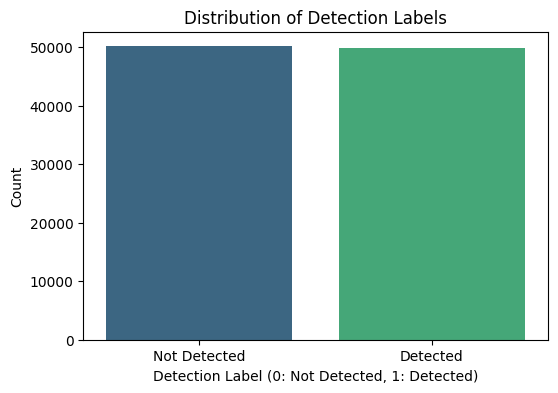

In [348]:
detection_label_counts = data['Detection Label'].value_counts()
display(detection_label_counts)

# You can also visualize this with a proper bar chart for clarity
plt.figure(figsize=(6, 4))
sns.barplot(x=detection_label_counts.index, y=detection_label_counts.values, palette='viridis')
plt.title('Distribution of Detection Labels')
plt.xlabel('Detection Label (0: Not Detected, 1: Detected)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Detected', 'Detected'])
plt.show()

The bar chart shows a slighty perfect distribution between detection label.



### Next Steps

*   The data is now fully preprocessed making it ready for direct use in machine learning model training.


# MODEL IMPLEMENTATION:

In [349]:
leakage_features = [
    'Confidence Score',
    'Attack ID',
    'ML Model', 'Port Type'
]

data = data.drop(columns=leakage_features)


In [350]:
from sklearn.model_selection import train_test_split

X = data.drop('Detection Label', axis=1)
y = data['Detection Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)


# SVC MODEL

In [351]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearSVC(C=0.01))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearSVC(C=0.01))])

In [352]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.49743333333333334
              precision    recall  f1-score   support

    Detected       0.50      0.62      0.55     15047
Not Detected       0.49      0.38      0.43     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



## Parameter tuning

In [353]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(random_state=42, max_iter=10000))
])

param_svc = {
    "svc__C": np.logspace(-2, 2, 6),
    "svc__loss": ["hinge", "squared_hinge"],
    "svc__class_weight": [None, "balanced"]
}

random_search_svc = RandomizedSearchCV(
    pipe,
    param_distributions=param_svc,
    n_iter=10,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

random_search_svc.fit(X_train, y_train)


# results
print("Best parameters:", random_search_svc.best_params_)
print("Best CV score:", random_search_svc.best_score_)

# testing results
best_svc = random_search_svc.best_estimator_
test_accuracy = best_svc.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

# more details
results = pd.DataFrame(random_search_svc.cv_results_)
print(results[['params', 'mean_test_score', 'std_test_score']])


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'svc__loss': 'squared_hinge', 'svc__class_weight': 'balanced', 'svc__C': np.float64(0.06309573444801933)}
Best CV score: 0.49825714285714284
Test accuracy: 0.49406666666666665
                                              params  mean_test_score  \
0  {'svc__loss': 'hinge', 'svc__class_weight': 'b...         0.497700   
1  {'svc__loss': 'hinge', 'svc__class_weight': No...         0.497186   
2  {'svc__loss': 'squared_hinge', 'svc__class_wei...         0.498257   
3  {'svc__loss': 'hinge', 'svc__class_weight': 'b...         0.496871   
4  {'svc__loss': 'hinge', 'svc__class_weight': No...         0.497529   
5  {'svc__loss': 'squared_hinge', 'svc__class_wei...         0.498000   
6  {'svc__loss': 'hinge', 'svc__class_weight': No...         0.497443   
7  {'svc__loss': 'hinge', 'svc__class_weight': 'b...         0.497143   
8  {'svc__loss': 'hinge', 'svc__class_weight': 'b...         0.497143   
9  {'svc__loss'

In [354]:
best_log = random_search_log.best_estimator_
y_pred = best_log.predict(X_test)
# F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("Test F1-score:", f1) # Rapport complet
print("\nClassification report:\n", classification_report(y_test, y_pred))

Test F1-score: 0.4945735851106279

Classification report:
               precision    recall  f1-score   support

    Detected       0.50      0.55      0.52     15047
Not Detected       0.49      0.44      0.47     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



# Random forest

In [355]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [356]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


RF Accuracy: 0.49953333333333333
              precision    recall  f1-score   support

    Detected       0.50      0.53      0.52     15047
Not Detected       0.50      0.46      0.48     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



## Hyperparameter tuning

In [357]:
param_rf = {
      'max_depth': [8, 10, 12],
    'min_samples_split': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}



In [360]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report # Added import for f1_score and classification_report
import time # Import time for timing the fitting process

# Définir le modèle
rf = RandomForestClassifier(random_state=42)

# Définir la grille de paramètres
param_rf = {
    'max_depth': [8, 10, 12],
    'min_samples_split': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Random Search avec cross-validation
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    n_iter=5,              # nombre de combinaisons testées
    cv=5,                   # validation croisée
    scoring='f1_macro',     # métrique d'évaluation
    random_state=42,
    n_jobs=-1               # utilise tous les cœurs CPU
)

# training
start_fit_time = time.time()
random_search_rf.fit(X_train, y_train)
duration_fit = time.time() - start_fit_time
print(f"Duration for fitting Random Search RF: {duration_fit:.2f} seconds")

# Results
print("Best parameters (Random Forest):", random_search_rf.best_params_)
print("Best CV score (Random Forest):", random_search_rf.best_score_)

# Évaluation sur le test set
best_rf = random_search_rf.best_estimator_
test_accuracy_rf = best_rf.score(X_test, y_test)
print("Test accuracy (Random Forest):", test_accuracy_rf)

# F1-score and Classification Report for the best Random Forest model
y_pred_rf = best_rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print("Test F1-score (Random Forest):", f1_rf)
print("\nClassification report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Duration for fitting Random Search RF: 266.42 seconds
Best parameters (Random Forest): {'min_samples_split': 20, 'max_features': 'sqrt', 'max_depth': 10}
Best CV score (Random Forest): 0.49837810650142594
Test accuracy (Random Forest): 0.49623333333333336
Test F1-score (Random Forest): 0.49347206665580934

Classification report (Random Forest):
               precision    recall  f1-score   support

    Detected       0.50      0.57      0.53     15047
Not Detected       0.49      0.42      0.46     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



# Logistic regression

In [362]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

pipe_lr.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = pipe_lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.49746666666666667
              precision    recall  f1-score   support

    Detected       0.50      0.62      0.55     15047
Not Detected       0.49      0.38      0.43     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



## Hyperpamameter tuning

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd


log_reg = LogisticRegression(solver='liblinear', random_state=42)


param_log = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Search with cross-validation
random_search_log = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_log,
    n_iter=10,
    cv=cv,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Training
random_search_log.fit(X_train, y_train)

print("Best parameters:", random_search_log.best_params_)
print("Best CV score:", random_search_log.best_score_)


best_log = random_search_log.best_estimator_
test_accuracy = best_log.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

best_log = random_search_log.best_estimator_
y_pred = best_log.predict(X_test)
# F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("Test F1-score:", f1) # Rapport complet
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Results
results = pd.DataFrame(random_search_log.cv_results_)
print(results[['params', 'mean_test_score', 'std_test_score']])


Best parameters: {'penalty': 'l1', 'class_weight': 'balanced', 'C': np.float64(0.004641588833612777)}
Best CV score: 0.4969450651736155
Test accuracy: 0.49596666666666667
Test F1-score: 0.4945735851106279

Classification report:
               precision    recall  f1-score   support

    Detected       0.50      0.55      0.52     15047
Not Detected       0.49      0.44      0.47     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000

                                              params  mean_test_score  \
0  {'penalty': 'l2', 'class_weight': 'balanced', ...         0.495948   
1  {'penalty': 'l1', 'class_weight': None, 'C': 0...         0.490930   
2  {'penalty': 'l2', 'class_weight': 'balanced', ...         0.495852   
3  {'penalty': 'l1', 'class_weight': 'balanced', ...         0.496097   
4  {'penalty': 'l1', 'class_weight': None, 'C': 0...         0.483299   
5  {'

# Ensembles method

In [364]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

linear_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LinearSVC(
        C=1.0,
        max_iter=10000,
        class_weight="balanced",
        random_state=42
    ))
])


rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


In [365]:
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=[
        ("lr", log_reg),
        ("rf", rf),
        ("svc", linear_svc)
    ],
    final_estimator=meta_model,
    stack_method="predict",
    cv=5,
    n_jobs=-1
)


In [366]:
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5059666666666667
              precision    recall  f1-score   support

    Detected       0.51      0.51      0.51     15047
Not Detected       0.50      0.50      0.50     14953

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



# XGBoost

In [367]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

xgb_model = XGBClassifier(

)


In [368]:
xgb_model.fit(X_train, y_train_enc)

y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print(classification_report(y_test_enc, y_pred))


Accuracy: 0.5004666666666666
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     15047
           1       0.50      0.49      0.49     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



## Parameter tuning

In [369]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)
param_dist = {
    "n_estimators": [200, 300, 500],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(X_train, y_train_enc)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [200, 300, 500],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [370]:
best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))


Accuracy: 0.4967666666666667
              precision    recall  f1-score   support

    Detected       0.50      0.53      0.52     15047
Not Detected       0.49      0.46      0.48     14953

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

